In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-job-recruitment/clean_data.csv


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import string






import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import string 
import re
import spacy 
spacy.load('en_core_web_lg')
from spacy.lang.en import English
parser = English()

In [7]:
df = pd.read_csv('/kaggle/input/fake-job-recruitment/clean_data.csv')

In [8]:
df.head()

,Unnamed: 0,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
0,2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
1,3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
2,4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
4,13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [9]:
del df['Unnamed: 0']

In [10]:
df.isnull().sum()

title                  0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
city                   0
country_name           0
dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1['fraudulent'].value_counts()

0    11023
1      249
Name: fraudulent, dtype: int64

In [13]:
import spacy
nlp = spacy.load('en_core_web_lg')
stopwords = stopwords.words('english')

In [14]:
punctuations = string.punctuation

In [15]:
def cleanup_text(docs, logging = False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 100 == 0 and logging:
            print ("Processed %d out of %d documents."%(counter, len(docs)))
        counter +=1
        doc = nlp(doc, disable = ['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [16]:
Fraud_1 = [text for text in df1[df1['fraudulent'] == 1]['description']]

In [17]:
Fraud_1[10]

'We provide No Credit Check Financing to customers of Small and Medium size Businesses and can help 90% of the industries from Auto Mechanics to Dentists and Lawyers.We are seeking skilled Account Managers to grow with us and help us achieve our goals in this new and exciting industry.This is designed as a long-term position for an entrepreneurial individual to really build their book of business, along with their income.Our people enjoy a flexible work environment. High earnings with great incentives like corporate retreats and quick advancement opportunities. Experience and Skills \xa0Required- Minimum of 3 years of sales experience- Ability to work in a home office environment- Exceptional speaking, writing, and negotiation skills- You must be a motivated self starter and instil that others- College degree We have aggressive growth plans in place for the coming years. We provide a much needed service in facilitating the growth of small and medium size business with innovative financ

In [18]:
Fraud_0 = [text for text in df1[df1['fraudulent'] == 0]['description']]

In [19]:
Fraud_1_clean = cleanup_text(Fraud_1)
Fraud_1_clean = ' '.join(Fraud_1_clean).split()

In [20]:
len(Fraud_1_clean)

64435

In [21]:
Fraud_0_clean = cleanup_text(Fraud_0)
Fraud_0_clean = ' '.join(Fraud_0_clean).split()

In [22]:
len(Fraud_0_clean)

2770027

In [23]:
Fraud_1_counts = Counter(Fraud_1_clean)
Fraud_0_counts = Counter(Fraud_0_clean)

In [24]:
Fraud_1_common_words = [word[0] for word in Fraud_1_counts.most_common(20)]
Fraud_1_common_counts = [word[1] for word in Fraud_1_counts.most_common(20)]

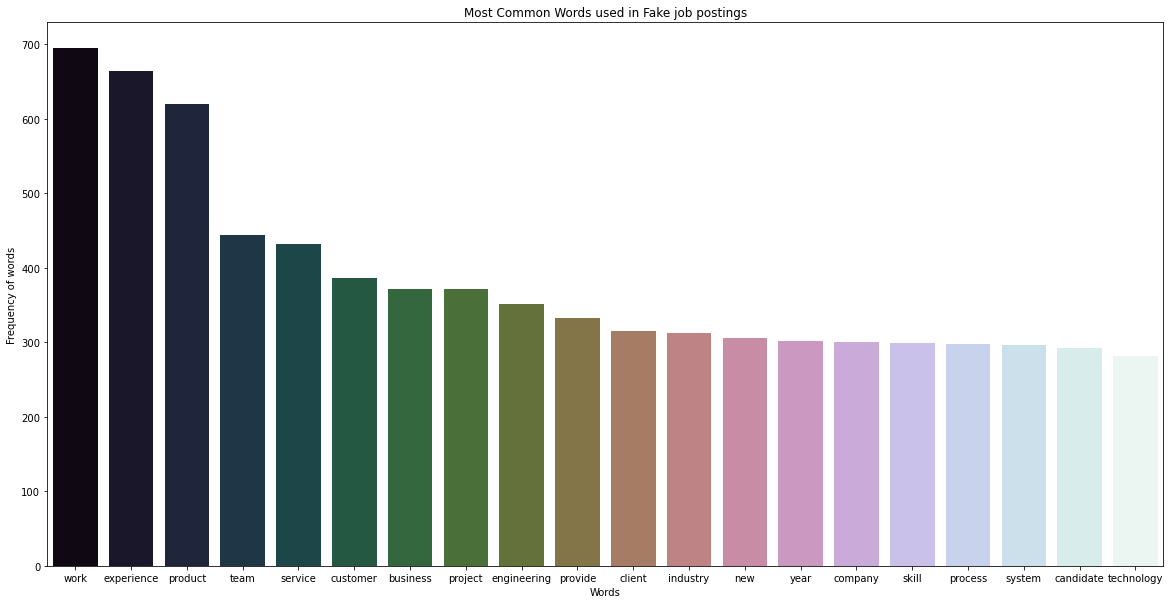

In [25]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_1_common_words, y = Fraud_1_common_counts, palette=pal)
plt.title('Most Common Words used in Fake job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [26]:
Fraud_0_common_words = [word[0] for word in Fraud_0_counts.most_common(20)]
Fraud_0_common_counts = [word[1] for word in Fraud_0_counts.most_common(20)]

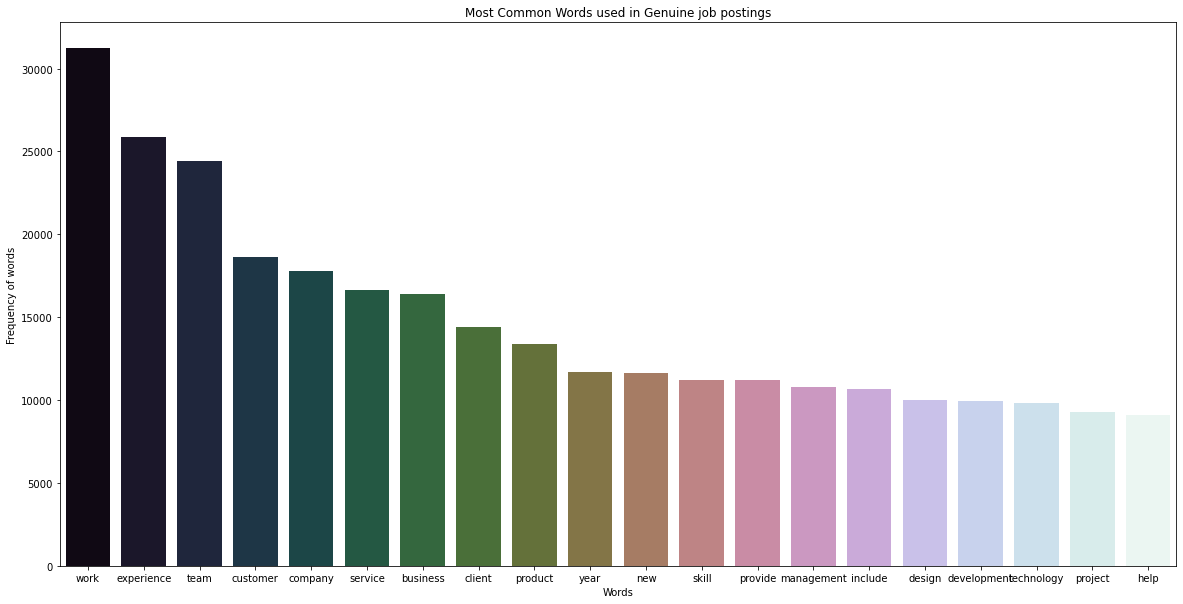

In [27]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_0_common_words, y = Fraud_0_common_counts, palette=pal)
plt.title('Most Common Words used in Genuine job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import spacy
nlp = spacy.load('en_core_web_lg')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [30]:
STOPLIST = set(stopwords + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ")

In [31]:
def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [32]:
vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)

In [33]:

vectorizer_features = vectorizer.fit_transform(df1['description'])

In [34]:
vectorizer_features.shape

(11272, 666)

In [35]:
vectorizer_features

<11272x666 sparse matrix of type '<class 'numpy.int64'>'
	with 991737 stored elements in Compressed Sparse Row format>

In [36]:
vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns = vectorizer.get_feature_names())
df_vectorized = pd.concat([df1, vectorized_df], axis = 1)

In [37]:
df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)

In [38]:
df_vectorized.head()

,title,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name,,experience,looking,tefl,tefl tesol,'s,1,10,100,2,2 years,200,200 cost,3,3 years,30,4,5,5 years,6,:),ability,ability work,able,abroad,abroad :),access,account,accounts,achieve,activities,addition,additional,advanced,advertising,agencies,agency,agile,amazing,amp,amp secure,amp secure jobs,analysis,analytical,analytics,and/or,application,applications,apply,approach,appropriate,apps,area,areas,aspects,assigned,assist,attention,attitude,available,bachelor,background,based,basic,basis,believe,benefits,best,better,big,brand,brands,bring,build,building,built,business,business process,businesses,calls,campaigns,candidate,candidates,capital,care,career,celta,center,challenges,change,changing,check,city,class,client,clients,close,closely,cloud,code,collaborative,come,comfortable,committed,communicate,communication,communication skills,communications,community,companies,company,competitive,complete,complex,compliance,computer,computer science,consulting,consumer,consumers,contact,content,continually,contract,control,core,corporate,cost,costs,cover,create,creating,creative,credit,critical,cross,culture,current,currently,customer,customer satisfaction,customer service,customers,daily,data,database,day,day day,decisions,dedicated,degree,degree required,degree required,deliver,delivering,delivers,delivery,department,design,designers,develop,developer,developers,developing,development,different,digital,diploma,direct,direction,directly,diverse,document,documentation,drive,driven,driving,duties,dynamic,e,easy,edge,education,effective,effectively,efficient,email,employee,employees,employer,employment,empower,end,energy,engage,engagement,engineer,engineering,engineers,english,enhance,enjoy,ensure,ensuring,enterprise,environment,environments,equipment,equivalent,essential,established,events,excel,excellent,exceptional,exciting,execute,executive,existing,experience,experience,experience preferred,experience working,experienced,experiences,expert,expertise,experts,external,fast,fast growing,fast paced,features,field,finance,financial,firm,flexibility,flexible,focus,focused,follow,following,founded,friendly,fun,functional,functions,future,general,generation,global,goal,goals,good,google,government,great,group,grow,growing,growth,handle,hands,hard,health,help,help teachers,help teachers safe,helping,high,high quality,highest,highly,hire,hiring,holders,home,hours,house,hr,html,human,ideal,ideal candidate,ideas,identify,impact,implement,implementation,important,improve,improvement,include,includes,including,increase,independently,individual,individuals,industry,information,innovation,innovative,integral,integrate,integration,integrity,interactions,interested,internal,international,internet,interpersonal,issues,javascript,job,jobs,jobs abroad,jobs abroad :),join,key,kids,kids paid,know,knowledge,language,large,largest,latest,lead,leader,leadership,leading,learn,learning,level,levels,life,like,limited,line,live,loans,loans credit,local,located,london,long,long term,look,looking,love,mail,maintain,maintaining,maintenance,major,make,making,manage,management,manager,managers,managing,manner,market,marketing,match,maximize,media,meet,meeting,meetings,member,members,microsoft,minimum,mission,mobile,model,month,monthly,monthly 200,monthly 200 cost,months,motivated,ms,multi,multiple,national,necessary,need,needed,needs,network,new,new york,non,number,offer,offering,offers,office,offices,online,open,operating,operations,opportunities,opportunity,optimize,oral,order,organization,organizational,organizations,oriented,outside,outstanding,paced,paid,partner,partners,passion,passionate,passport,people,perform,performance,performing,person,personal,phone,place,plan,planning,plans,platform,platforms,play,play kids,play kids paid,plus,policies,portfolio,position,positions,positive,possess,possible,potential,practice,pr

In [39]:

columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)

In [40]:
columns_to_1_hot += ['title', 'city', 'country_name']
df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)

In [41]:
target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)

In [42]:
Model_Score = []
Model_Name = []

In [43]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [44]:
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']

param_grid = dict(C = c_values, penalty = penalty_options)

In [45]:
grid_tfidf = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)

In [51]:
grid_tfidf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   54.0s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [53]:
log_reg_pred = grid_tfidf.predict(X_test)

In [54]:
grid_tfidf.best_score_

0.9885987106336861

In [55]:
roc_auc_score(y_test, log_reg_pred)

0.7795466908431551

In [56]:

print (classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1103
           1       0.93      0.56      0.70        25

    accuracy                           0.99      1128
   macro avg       0.96      0.78      0.85      1128
weighted avg       0.99      0.99      0.99      1128



In [57]:
Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(y_test, log_reg_pred), 4))

In [58]:

knn = KNeighborsClassifier()
k_range = list(np.arange(2, 23, 2))
param_grid_knn = dict(n_neighbors = k_range)
print (param_grid_knn)

{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}


In [59]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [60]:
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed: 10.8min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                         22]},
             scoring='roc_auc', verbose=1)

In [61]:
grid_knn.best_score_

0.9612380267435932

In [62]:
grid_knn.best_params_

{'n_neighbors': 22}

In [63]:
knn_pred = grid_knn.predict(X_test)

In [64]:
print (roc_auc_score(y_test, knn_pred))
print (classification_report(y_test, knn_pred))

0.6
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1103
           1       1.00      0.20      0.33        25

    accuracy                           0.98      1128
   macro avg       0.99      0.60      0.66      1128
weighted avg       0.98      0.98      0.98      1128



In [65]:
Model_Name.append('KNN')
Model_Score.append(round(roc_auc_score(y_test, knn_pred), 4))

In [66]:
svc = SVC()
kernel = ['linear', 'rbf']
param_grid_knn = dict(kernel = kernel)
print (param_grid_knn)

{'kernel': ['linear', 'rbf']}


In [67]:
grid_svc = GridSearchCV(svc, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

In [68]:
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']}, scoring='roc_auc',
             verbose=2)

In [69]:
grid_svc.best_score_

0.9761839777508605

In [70]:
grid_svc.best_params_

{'kernel': 'linear'}

In [71]:
svc_pred = grid_svc.predict(X_test)

In [72]:
print (roc_auc_score(y_test, svc_pred))
print (classification_report(y_test, svc_pred))

0.8195466908431551
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1103
           1       0.94      0.64      0.76        25

    accuracy                           0.99      1128
   macro avg       0.97      0.82      0.88      1128
weighted avg       0.99      0.99      0.99      1128



In [73]:
Model_Name.append('SVC')
Model_Score.append(round(roc_auc_score(y_test, svc_pred), 4))

In [74]:
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [75]:
grid_rf.fit(X_train, y_train)
print (grid_rf.best_score_)
print (grid_rf.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   58.4s finished


0.9908111731799056
{'n_estimators': 100}


In [76]:

rf_pred = grid_rf.predict(X_test)
print (roc_auc_score(y_test, rf_pred))
print (classification_report(y_test, rf_pred))

0.76
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1103
           1       1.00      0.52      0.68        25

    accuracy                           0.99      1128
   macro avg       0.99      0.76      0.84      1128
weighted avg       0.99      0.99      0.99      1128



In [77]:
Model_Name.append('Random_Forest')
Model_Score.append(round(roc_auc_score(y_test, rf_pred), 4))


In [78]:
mlp = MLPClassifier(solver = 'sgd', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [79]:

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000, solver='sgd')

In [80]:

mlp_pred = mlp.predict(X_test)
print (roc_auc_score(y_test, mlp_pred))
print (classification_report(y_test, mlp_pred))

0.7595466908431551
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1103
           1       0.93      0.52      0.67        25

    accuracy                           0.99      1128
   macro avg       0.96      0.76      0.83      1128
weighted avg       0.99      0.99      0.99      1128



In [81]:
Model_Name.append('MLP-NN (sgd)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

In [82]:

mlp = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [83]:

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [84]:
mlp_pred = mlp.predict(X_test)
print (roc_auc_score(y_test, mlp_pred))
print (classification_report(y_test, mlp_pred))

0.8200000000000001
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1103
           1       1.00      0.64      0.78        25

    accuracy                           0.99      1128
   macro avg       1.00      0.82      0.89      1128
weighted avg       0.99      0.99      0.99      1128



In [85]:

Model_Name.append('MLP-NN (adam)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

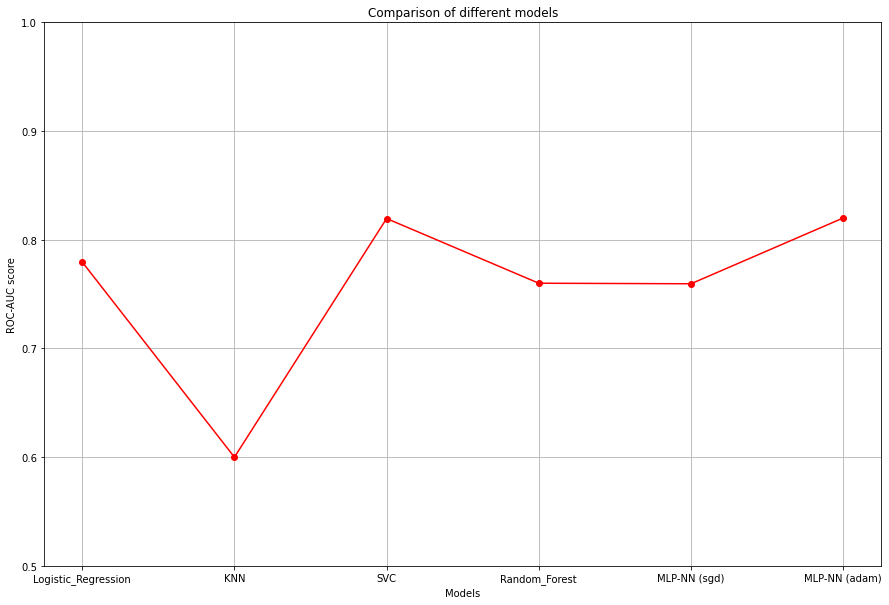

In [86]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()

In [ ]:
print(Model_Name)
print(Model_Score)